In [1]:
import numpy as np
import os
import pandas as pd
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img=[]
for i in range(9):
    
    path="C:/Users/HP/Downloads/ClothingAttributeDataset/ClothingAttributeDataset/images/00000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path))


IndexError: list index out of range

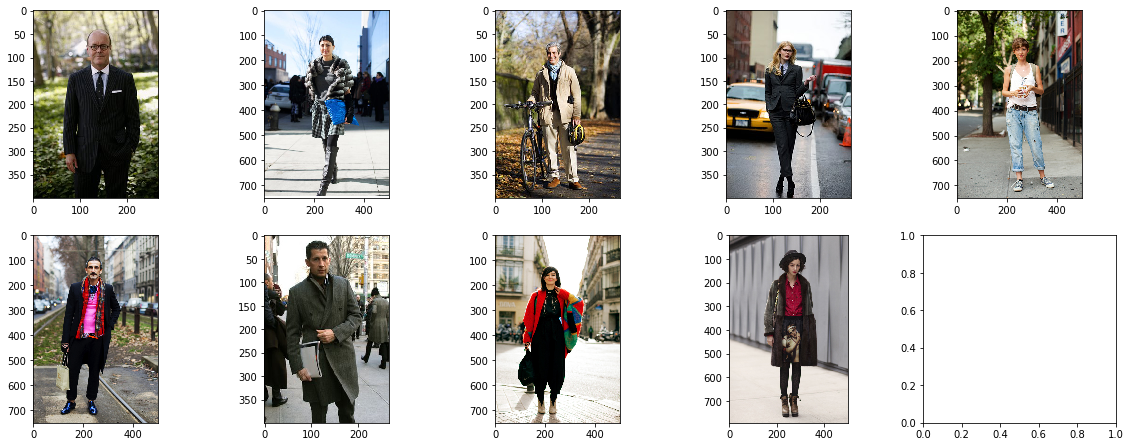

In [3]:
plt.figure(figsize=(20,20))
for i in range (5):
    for j in range (5):
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(img[i*5+j])

In [9]:
######### trendy score ############
def pre(img):
    dim0=299
    dim1=240
    img=np.asarray(img)
    a,b,c=img.shape
    x_start=(a-dim0)//2
    x_end=x_start+dim0
    y_start=(b-dim1)//2
    y_end=y_start+dim1
    img=img[x_start:x_end,y_start:y_end,:]
    if img.shape[0]==300:
        img=img[1:,:,:]
    if img.shape[1]==241:
        img=img[:,1:,:]
    print(img.shape)
    return img

(299, 240, 3)


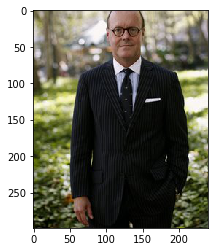

In [10]:
plt.imshow(pre(img[0]))

In [6]:

data=data.reshape((1856,240,240))
data.shape

(1856, 240, 240)

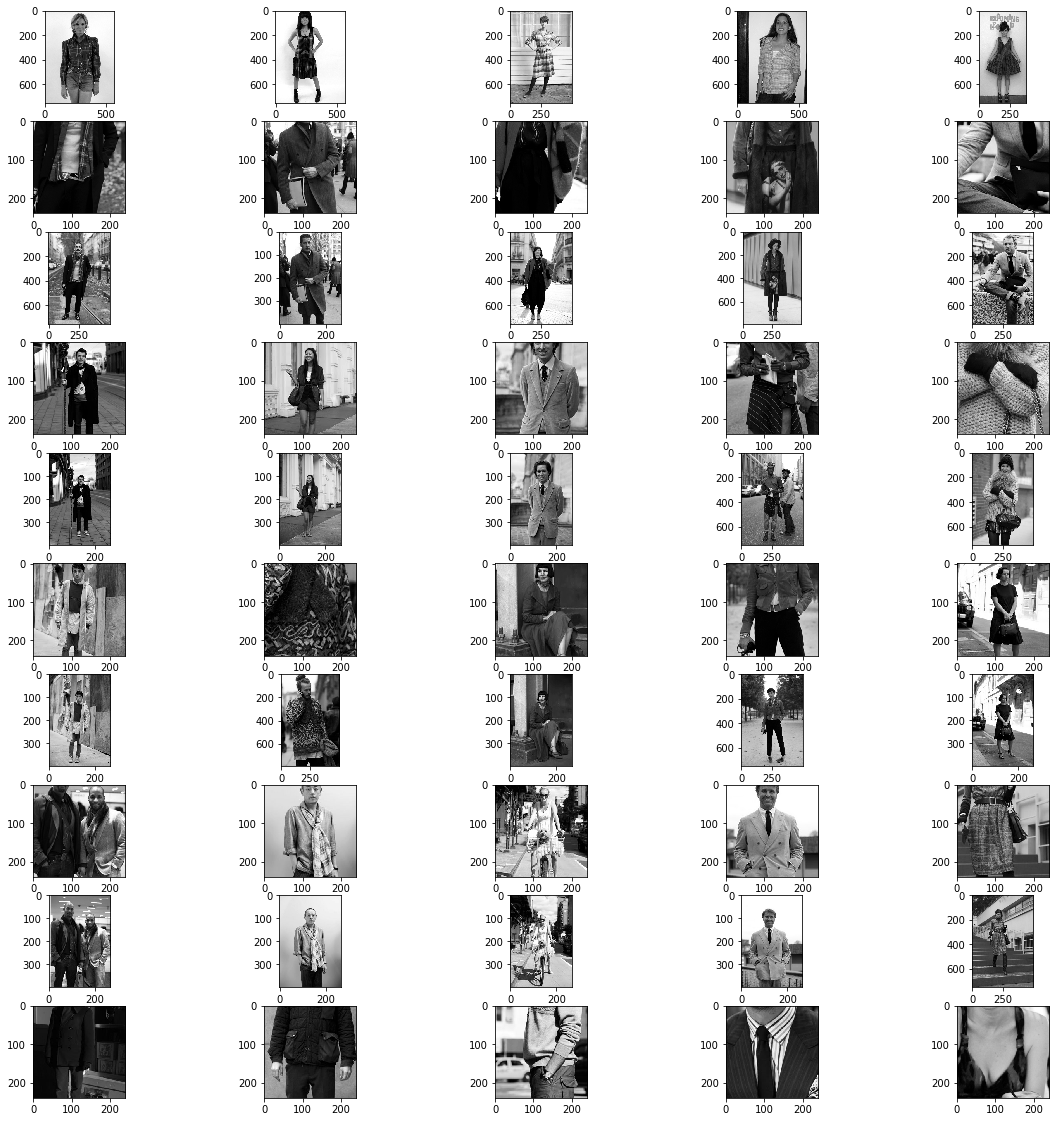

In [7]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(img[(i-1)*5+j],cmap='gray')
        

In [8]:
downsizing_model=keras.models.Sequential([
    keras.layers.AveragePooling2D((2,2),(2,2),input_shape=(240,240,1)),
    keras.layers.AveragePooling2D((2,2),(2,2))
])

In [9]:
downsizing_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 120, 120, 1)       0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 60, 60, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [10]:
data.shape

(1856, 240, 240)

In [11]:
data.shape

(1856, 240, 240)

In [12]:
 ##############temp checking##########################

In [13]:
data=downsizing_model.predict(data.reshape((-1,240,240,1)))

In [14]:
data.shape

(1856, 60, 60, 1)

In [15]:
data=data.reshape((-1,60,60))

In [ ]:
############end testeing ##############

In [ ]:
#########adding noise#############

In [ ]:
data=(data-127.5)/127.5 ########remenber to remove it later

In [ ]:
noise = np.random.normal(0, .1, data.shape)

In [ ]:
data=data+noise

In [ ]:
############ end noise########################

In [ ]:
new_data=np.where(data<135,255-data,0)

In [ ]:
new_data.shape

In [ ]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j+100],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(new_data[(i-1)*5+j+100],cmap='gray')

In [ ]:
new_data=downsizing_model.predict(new_data.reshape((-1,240,240,1)))

In [ ]:
new_data.shape

In [ ]:
new_data=new_data.reshape((-1,60,60))

In [ ]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j+100],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(new_data[(i-1)*5+j+100],cmap='gray')

In [ ]:
data=new_data

In [ ]:
data.shape

In [ ]:
plt.figure(figsize=(20,20))
for i in range (5):
    
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j+100])
   

In [16]:
data=np.asarray(data)

In [17]:
import scipy.io
import os 

In [18]:
data_y=[]
data_y_col_name=[]
directory=r"C:\Users\HP\Downloads\ClothingAttributeDataset\ClothingAttributeDataset\labels"
for filename in os.listdir(directory):
    data_y_col_name.append(filename)
    path=os.path.join(directory, filename)
    data_y_temp=(scipy.io.loadmat(path))
    data_y.append(np.asarray(data_y_temp['GT']))

In [19]:
data_y_col_name

['black_GT.mat',
 'blue_GT.mat',
 'brown_GT.mat',
 'category_GT.mat',
 'collar_GT.mat',
 'cyan_GT.mat',
 'gender_GT.mat',
 'gray_GT.mat',
 'green_GT.mat',
 'many_colors_GT.mat',
 'neckline_GT.mat',
 'necktie_GT.mat',
 'pattern_floral_GT.mat',
 'pattern_graphics_GT.mat',
 'pattern_plaid_GT.mat',
 'pattern_solid_GT.mat',
 'pattern_spot_GT.mat',
 'pattern_stripe_GT.mat',
 'placket_GT.mat',
 'purple_GT.mat',
 'red_GT.mat',
 'scarf_GT.mat',
 'skin_exposure_GT.mat',
 'sleevelength_GT.mat',
 'white_GT.mat',
 'yellow_GT.mat']

In [20]:
data_y=np.asarray(data_y)

In [21]:
data_y=np.asarray(data_y)
data_y=data_y.T
data_y=data_y.reshape((1856,26))
data_y.shape

(1856, 26)

In [22]:
data_y_pd=pd.DataFrame(data_y,columns=data_y_col_name)

In [23]:
data_y_pd.head()

,black_GT.mat,blue_GT.mat,brown_GT.mat,category_GT.mat,collar_GT.mat,cyan_GT.mat,gender_GT.mat,gray_GT.mat,green_GT.mat,many_colors_GT.mat,...,pattern_spot_GT.mat,pattern_stripe_GT.mat,placket_GT.mat,purple_GT.mat,red_GT.mat,scarf_GT.mat,skin_exposure_GT.mat,sleevelength_GT.mat,white_GT.mat,yellow_GT.mat
0,2.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
1,1.0,1.0,1.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,...,1.0,NaN,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
2,2.0,1.0,1.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
3,2.0,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
4,1.0,1.0,1.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0


In [24]:
data_y_pd.drop(['black_GT.mat','blue_GT.mat','brown_GT.mat','cyan_GT.mat','gray_GT.mat','green_GT.mat','many_colors_GT.mat','purple_GT.mat','red_GT.mat','white_GT.mat','yellow_GT.mat'],axis=1, inplace=True)

In [25]:
print(data_y_pd.shape)
data_y_pd.head()

(1856, 15)


,category_GT.mat,collar_GT.mat,gender_GT.mat,neckline_GT.mat,necktie_GT.mat,pattern_floral_GT.mat,pattern_graphics_GT.mat,pattern_plaid_GT.mat,pattern_solid_GT.mat,pattern_spot_GT.mat,pattern_stripe_GT.mat,placket_GT.mat,scarf_GT.mat,skin_exposure_GT.mat,sleevelength_GT.mat
0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0,3.0
1,NaN,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,3.0
2,4.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0
3,5.0,2.0,2.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0
4,6.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0


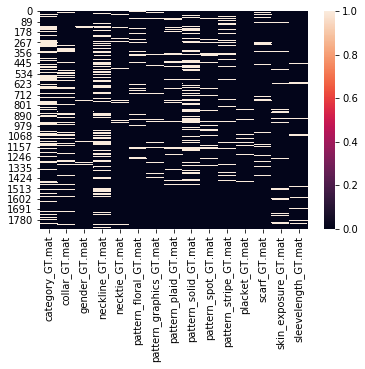

In [26]:
sns.heatmap(data_y_pd.isnull())

In [27]:
data_y_pd.isnull().sum()

category_GT.mat            752
collar_GT.mat              394
gender_GT.mat               62
neckline_GT.mat            542
necktie_GT.mat             117
pattern_floral_GT.mat      138
pattern_graphics_GT.mat     78
pattern_plaid_GT.mat       116
pattern_solid_GT.mat       363
pattern_spot_GT.mat        136
pattern_stripe_GT.mat      182
placket_GT.mat              73
scarf_GT.mat               190
skin_exposure_GT.mat       166
sleevelength_GT.mat         75
dtype: int64

In [28]:
data_y_pd.describe()

,category_GT.mat,collar_GT.mat,gender_GT.mat,neckline_GT.mat,necktie_GT.mat,pattern_floral_GT.mat,pattern_graphics_GT.mat,pattern_plaid_GT.mat,pattern_solid_GT.mat,pattern_spot_GT.mat,pattern_stripe_GT.mat,placket_GT.mat,scarf_GT.mat,skin_exposure_GT.mat,sleevelength_GT.mat
count,1104.000000,1462.000000,1794.000000,1314.000000,1739.000000,1718.000000,1778.000000,1740.000000,1493.000000,1720.000000,1674.000000,1783.000000,1666.000000,1690.000000,1781.000000
mean,4.407609,1.612175,1.575251,1.693303,1.121334,1.040163,1.061867,1.060345,1.704622,1.058721,1.083632,1.650028,1.140456,1.114201,2.607524
std,1.975043,0.487421,0.494443,0.743287,0.326609,0.196398,0.240982,0.238193,0.456366,0.235170,0.276918,0.477095,0.347564,0.318150,0.670678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,5.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000
75%,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000
max,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000


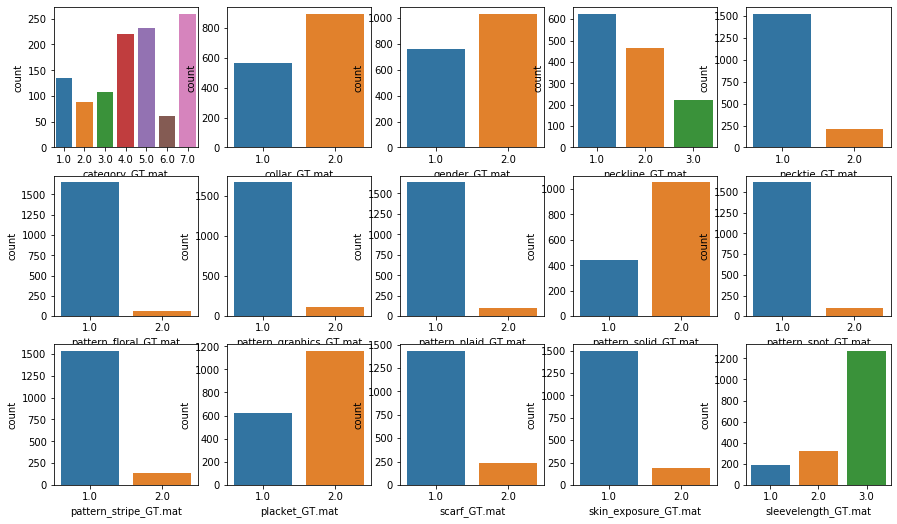

In [29]:
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    sns.countplot(x=data_y_pd.iloc[:,i],data=data_y_pd)
plt.show()

In [30]:
for col_name in data_y_pd.columns: 
    if col_name=='slevelength_GT.mat':
        data_y_pd[col_name].fillna(data_y_pd[col_name].mode(),inplace=True)
    elif col_name=='category_GT.mat':
        data_y_pd[col_name].fillna(8,inplace=True)
    elif col_name=='neckline_GT.mat':
        data_y_pd[col_name].fillna(4,inplace=True)
    else:
        data_y_pd[col_name].fillna(1,inplace=True)

In [31]:
data_y_pd.head(1)

,category_GT.mat,collar_GT.mat,gender_GT.mat,neckline_GT.mat,necktie_GT.mat,pattern_floral_GT.mat,pattern_graphics_GT.mat,pattern_plaid_GT.mat,pattern_solid_GT.mat,pattern_spot_GT.mat,pattern_stripe_GT.mat,placket_GT.mat,scarf_GT.mat,skin_exposure_GT.mat,sleevelength_GT.mat
0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0


In [32]:
data_y=np.asarray(data_y_pd)
data_y=data_y-1

In [33]:
data_y[0]

array([4., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2.])

In [34]:
data_y_pd=pd.DataFrame(data_y)

In [35]:
data_y_pd.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [36]:
data_y_pd=pd.get_dummies(data_y_pd,columns=[0,3,14])

In [37]:
data_y_pd.head()

,1,2,4,5,6,7,8,9,10,11,...,0_5.0,0_6.0,0_7.0,3_0.0,3_1.0,3_2.0,3_3.0,14_0.0,14_1.0,14_2.0
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0


In [38]:
data_y=np.asarray(data_y_pd)

In [39]:
temp=np.sum(data_y[:,3:9],axis=1)

In [40]:
data_y

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [41]:
data_y[:,5:11]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [42]:
r=range(1856)
t=np.zeros((1856))
key={}
for i in range(1856):
    a=data_y==data_y[i]
    for xi,x in enumerate(a):
        if(np.sum(x)==27 and t[xi]==0):
            t[xi]=r[i]
            key[r[i]]=list(data_y[i])


In [43]:
unique=[]
count=[]
for x in t:
    if x in unique:
        ind=unique.index(x)
        count[ind]=count[ind]+1
    else:
        unique.append(x)
        count.append(1)
    

In [44]:
len(unique),len(count)

(660, 660)

In [45]:
del key[0]

In [46]:
key

{1: [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 2: [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 3: [1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 4: [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0],
 5: [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 6: [1.0,
  0.0,
  0.0,
  0.0,
  0.

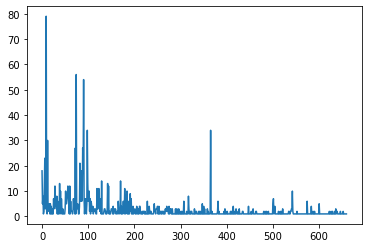

In [47]:
plt.plot(range(len(count)),count)


In [48]:
t=np.asarray(t,dtype=int)

In [49]:
t

array([ 222,    1,    2, ..., 1853,  705, 1441])

In [50]:
temp1=[]
key2={}

for a in t:
    if a in temp1:
        continue
    else:
        temp1.append(a)
        key2[a]=temp1.index(a)

In [51]:
len(temp1)

660

In [52]:
y=[]
for ti in t:
    y.append(temp1.index(ti))

In [53]:
y=np.asarray(y)

In [54]:
scipy.stats.mode(y)

ModeResult(mode=array([9]), count=array([79]))

In [55]:
y

array([  0,   1,   2, ..., 659, 317, 490])

In [56]:

def build_dis():
    in_label = keras.layers.Input(shape=(1,))
    
    in_label2=keras.layers.Embedding(660,60)(in_label)
    labels_layer1 = keras.layers.Dense(60 * 60)(in_label2)
    labels_layer1=keras.layers.LeakyReLU(0.2)(labels_layer1)
    labels_layer2 = keras.layers.Reshape((60, 60,1))(labels_layer1)
    
    in_image = keras.layers.Input(shape=(60,60,1))

    merge = keras.layers.Concatenate()([in_image, labels_layer2])


  
    
    l1=merge
    l2=keras.layers.Conv2D(128, (3,3), (2,2), padding="same")(l1)
    l2=keras.layers.LeakyReLU(0.2)(l2)
   
    
    
    l3=keras.layers.Conv2D(128, (3,3), (1,1), padding="same")(l2)
    l3=keras.layers.LeakyReLU(0.2)(l3)
  
       
 
    
    l4=keras.layers.Conv2D(64, (3,3), (2,2), padding="same")(l3)
    l4=keras.layers.LeakyReLU(0.2)(l4)

    
    
    l4=keras.layers.Flatten()(l4)
    l4=keras.layers.Dropout(0.3)(l4)
    l_final=keras.layers.Dense(1, activation='sigmoid')(l4)

    dis = keras.Model([in_image, in_label], l_final)
    return dis
################33

dis=build_dis()
from keras.optimizers import Adam
opt = Adam(lr=0.0002, beta_1=0.5)


dis.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [57]:
dis.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 60)        39600       input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 3600)      219600      embedding[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 1, 3600)      0           dense[0][0]                      
_______________________________________________________________________________________

In [58]:
def build_generator():
    in_label = keras.layers.Input(shape=(1,))
    in_label2=keras.layers.Embedding(660,60)(in_label)
    label1=keras.layers.Dense(225)(in_label2)
    label1=keras.layers.LeakyReLU(0.2)(label1)
    label2=keras.layers.Reshape((15,15,1))(label1)

    
   
    
    

    in_img=keras.layers.Input(shape=(100,))
    img1=keras.layers.Dense(32*15*15)(in_img)
    img1=keras.layers.LeakyReLU(0.2)(img1)
    img2=keras.layers.Reshape((15,15,32))(img1)


    merge = keras.layers.Concatenate()([label2,img2 ])

    
    l1=keras.layers.Conv2DTranspose( 128,(4,4), (2,2),padding='same', )(merge)
    l1 = keras.layers.LeakyReLU(alpha=0.2)(l1)
   
       
    l1=keras.layers.Dropout(0.1)(l1)
    
    
    l2=keras.layers.Conv2DTranspose( 128,(4,4), (2,2),padding='same')(l1)
    l2 = keras.layers.LeakyReLU(alpha=0.2)(l2)
   
       
    l2=keras.layers.Dropout(0.1)(l2)
    
    
    l3=keras.layers.Conv2DTranspose( 64,(4,4), (1,1),padding='same',dtype='float32')(l2)
    l3 = keras.layers.LeakyReLU(alpha=0.2)(l3)
    l3=keras.layers.Dropout(0.2)(l3)
    
  
    l_final2=keras.layers.Conv2D(1, (5,5), (1,1), padding="same", activation="tanh")(l3)

    gen = keras.Model([in_img,in_label], l_final2)
    return gen

gen=build_generator()
gen.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 60)        39600       input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1, 225)       13725       embedding_1[0][0]                
_______________________________________________________________________________________

In [59]:
def define_gan(g_model, d_model):
    d_model.trainable = False

    gen_noise, gen_label = g_model.input

    gen_output = g_model.output

    gan_output = d_model([gen_output, gen_label])
    
    model = keras.Model([gen_noise, gen_label], gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [60]:
gan=define_gan(gen,dis)

In [61]:
def load_real_samples():

    X = np.expand_dims(data, axis=-1)

    X = X.astype('float32')
   
    X=(X-127.5)/127.5

    return [X,y]


import random
def generate_real_samples(n_samples):

    images, labels = load_real_samples()
 
    ix = random.sample(range(images.shape[0]), n_samples)

    X, labels = images[ix], labels[ix]

    y1 = np.ones((n_samples, 1))
    return [X, labels], y1

In [62]:
generate_real_samples(1)

([array([[[[ 0.60490197],
           [ 0.5735294 ],
           [ 0.5009804 ],
           ...,
           [ 0.25245097],
           [ 0.29558823],
           [ 0.4107843 ]],
  
          [[ 0.1754902 ],
           [ 0.31960785],
           [ 0.46617648],
           ...,
           [ 0.25245097],
           [ 0.19607843],
           [ 0.21421568]],
  
          [[-0.50735295],
           [-0.4019608 ],
           [ 0.23382352],
           ...,
           [ 0.44509804],
           [ 0.4019608 ],
           [ 0.40294117]],
  
          ...,
  
          [[-0.51617646],
           [-0.5764706 ],
           [-0.5892157 ],
           ...,
           [ 0.62941176],
           [ 0.6372549 ],
           [ 0.6377451 ]],
  
          [[-0.48284313],
           [-0.5259804 ],
           [-0.5348039 ],
           ...,
           [ 0.6279412 ],
           [ 0.6357843 ],
           [ 0.64705884]],
  
          [[-0.45196077],
           [-0.45539215],
           [-0.46911764],
           ...,
        

In [63]:
def generate_latent_points(latent_dim, n_samples, n_classes=660):

    x_input = np.random.randn(latent_dim * n_samples)

    z_input = x_input.reshape(n_samples, latent_dim)
    
    labels = np.random.randint(0, n_classes, n_samples)
    return [z_input, labels]
 

def generate_fake_samples(generator, latent_dim, n_samples):

    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
 

    images = generator.predict([z_input, labels_input])

    y = np.zeros((n_samples, 1))
    return [images, labels_input], y

In [64]:
############checking the data is the desired data or not####################

In [65]:
data.shape

(1856, 60, 60)

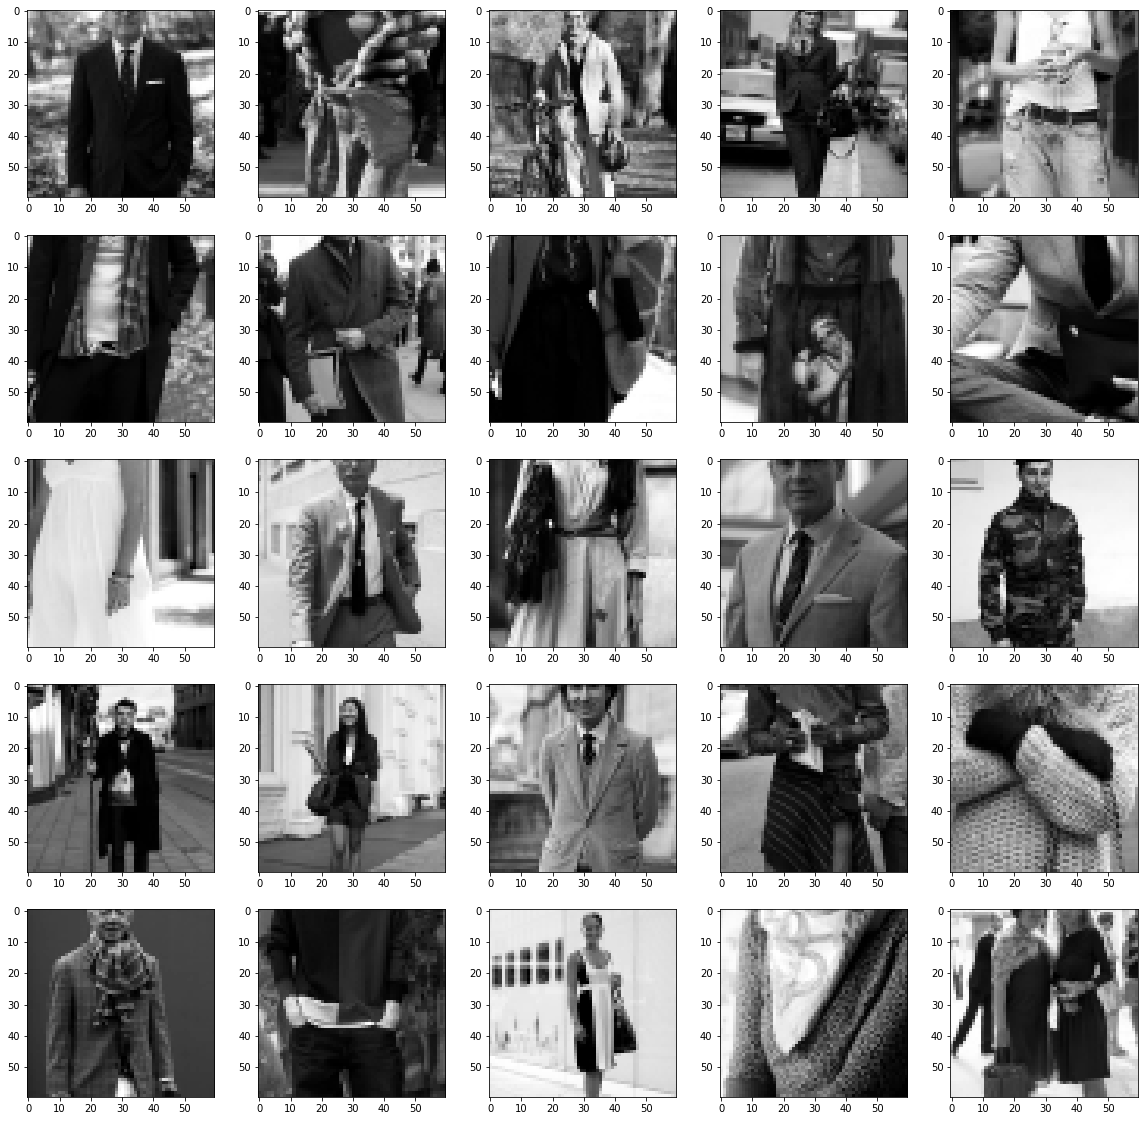

In [66]:
plt.figure(figsize=(20,20))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(data[i].reshape((60,60)),cmap='gray')

In [67]:
#############checking done####################################

In [68]:
# train the generator and discriminator
d_1=[]
d_2=[]
ga_=[]
def train(g_model, d_model, gan_model, latent_dim, n_epochs=100, n_batch=128):
    print("here")
    bat_per_epo = 3*int(data.shape[0] / n_batch)
    print(bat_per_epo)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        print("here")
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            print(i+1,j+1)
            # get randomly selected 'real' samples
            [X_real, labels_real], y_real = generate_real_samples( half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
            # generate 'fake' examples
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            # prepare points in latent space as input for the generator
            [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
            # summarize loss on this batch
            d_1.append(d_loss1)
            d_2.append(d_loss2)
            ga_.append(g_loss)
        
        if(i%10==0):
            [predictions,_],_ = generate_fake_samples(gen,100,25)
            predictions=np.asarray(predictions)
            plt.figure(figsize=(20,20))
            for it in range(25):
                  plt.subplot(5, 5, it+1)
                  plt.imshow(predictions[it].reshape((60,60)) * 127.5 + 127.5, cmap='gray')
                  plt.axis('off')
            plt.savefig('hb_w_image_at_epoch_{:04d}.png'.format(i))
            plt.figure(figsize=(10,10))
            plt.plot(ga_,label='ga_')
            plt.plot(d_1,label='d_1')
            plt.plot(d_2,label='d_2')
            plt.savefig('hb_w_graph_at_epoch_{:04d}.png'.format(i))
            plt.legend()
    
    # save the generator model
    



In [ ]:
train(gen,dis,gan,100,200)

here
42
here
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
here
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
here
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
here
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
here
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 

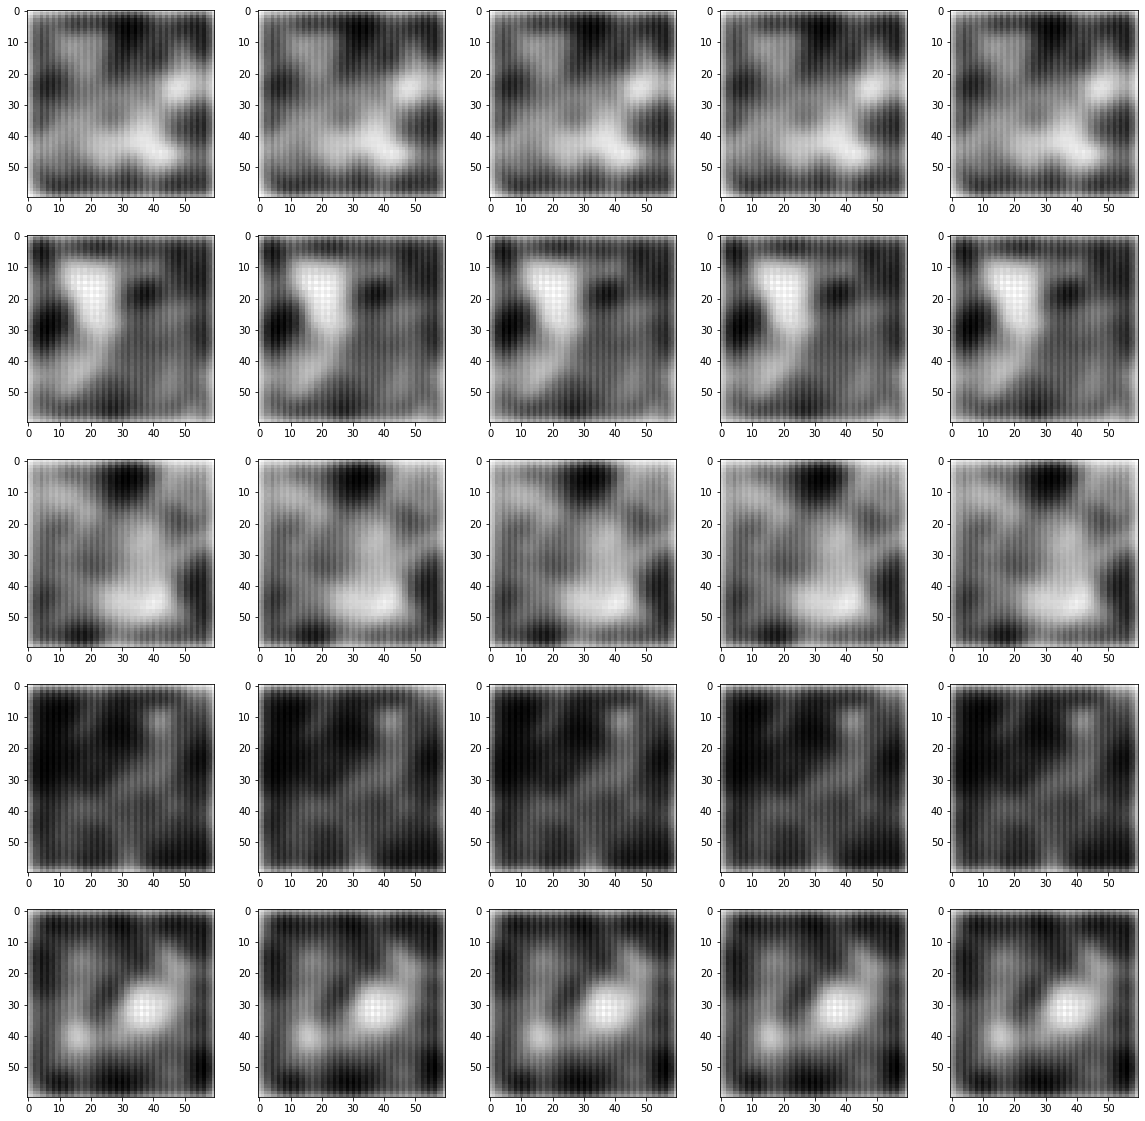

In [70]:
[x,_],_=generate_fake_samples(gen,100,25)
x=np.asarray(x)
x=x.reshape((-1,60,60))

plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(x[i] * 127.5 + 127.5,cmap='gray')

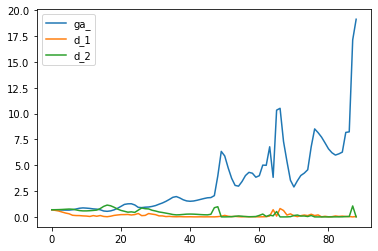

In [71]:
plt.plot(ga_,label='ga_')
plt.plot(d_1,label='d_1')
plt.plot(d_2,label='d_2')
plt.legend()

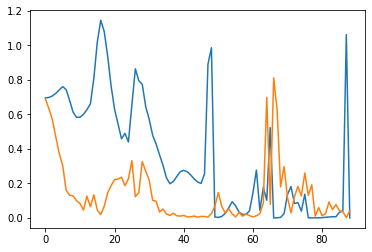

In [72]:
plt.plot(d_2)
plt.plot(d_1)

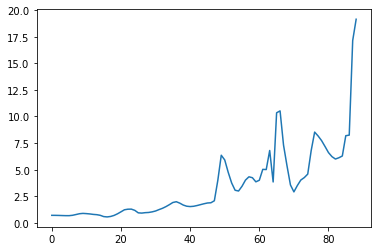

In [73]:
plt.plot(ga_)

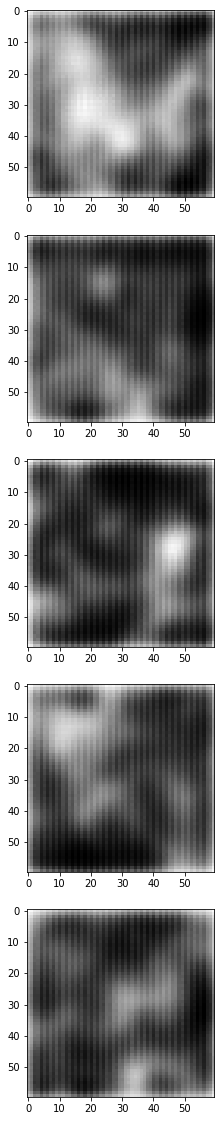

In [74]:
[x,_],_=generate_fake_samples(gen,100,25)
x=np.asarray(x)
x=x.reshape((-1,60,60))
plt.figure(figsize=(20,20))
for i in range(5):
    
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(x[i] * 127.5 + 127.5,cmap='gray')